# Separation and entry elasticities

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Baseline](#toc2_)    
- 3. [Convergence to exogenous separations](#toc3_)    
- 4. [Convergence to free entry](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav.misc import elapsed
from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load()

In [3]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Baseline](#toc0_)

In [4]:
model.find_ss(calib_beta=False)
model.compute_jacs(skip_shocks=True)
model.find_transition_path(shocks=['shock_TFP'],do_end_check=False)

## 3. <a id='toc3_'></a>[Convergence to exogenous separations](#toc0_)

In [5]:
models = []
labels = []
for psi in [0.0,0.001,0.01,0.1]:
    
    print(f'{psi = }')
    
    model_ = model.copy()
    model_.par.psi = psi
    if np.isclose(psi,0.0): model_.par.exo_sep = True
       
    model_.find_ss(calib_beta=False)
    model_.compute_jacs(skip_shocks=True)
    model_.find_transition_path(shocks=['shock_TFP'],do_end_check=False)
    
    models.append(model_)
    if model_.par.exo_sep:
        labels.append(f'$\psi = {psi}$ (exo. sep.)')
    else:
        labels.append(f'$\psi = {psi}$')    


psi = 0.0


psi = 0.001


psi = 0.01


psi = 0.1


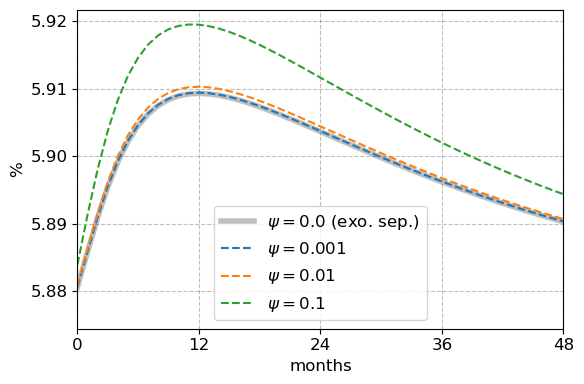

In [6]:
fig,ax = create_fig()

for model_,label in zip(models,labels):
    if model_.par.exo_sep == False:
        ax.plot(model_.path.u[:,0]*100,label=label,ls='--')
    else:
        ax.plot(model_.path.u[:,0]*100,label=label,color='black',lw=4,alpha=0.25)

save_fig(fig,ax,
         filename='convergence_psi_u',
         ylabel='%',legend=True)

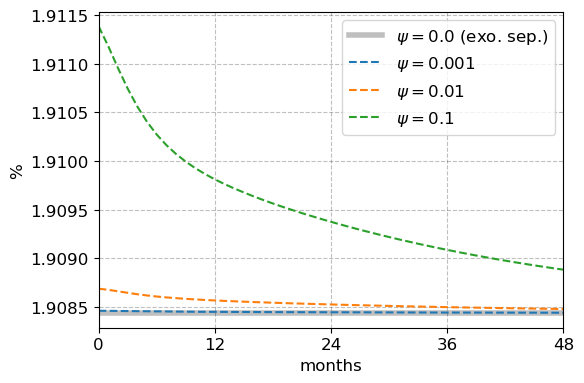

In [7]:
fig,ax = create_fig()

for model_,label in zip(models,labels):
    if model_.par.exo_sep == False:
        ax.plot(model_.path.delta[:,0]*100,label=label,ls='--')
    else:
        ax.plot(model_.path.delta[:,0]*100,label=label,color='black',lw=4,alpha=0.25)
            
save_fig(fig,ax,
         filename='convergence_psi_delta',
         ylabel='%',legend=True)

## 4. <a id='toc4_'></a>[Convergence to free entry](#toc0_)

In [8]:
models = []
labels = []
for xi in [np.inf,5.0,1.0,0.1]:
    
    print(f'{xi = }')
    
    model_ = model.copy()
    model_.par.xi = xi
    if np.isinf(xi): model_.set_macros(free_entry=True)
       
    model_.find_ss(calib_beta=False)
    model_.compute_jacs(skip_shocks=True)
    model_.find_transition_path(shocks=['shock_TFP'],do_end_check=False)
    models.append(model_)
    if model_.par.free_entry:
        labels.append(f'free entry')
    else:
        labels.append(f'$\\xi = {xi}$')


xi = inf


xi = 5.0


xi = 1.0


xi = 0.1


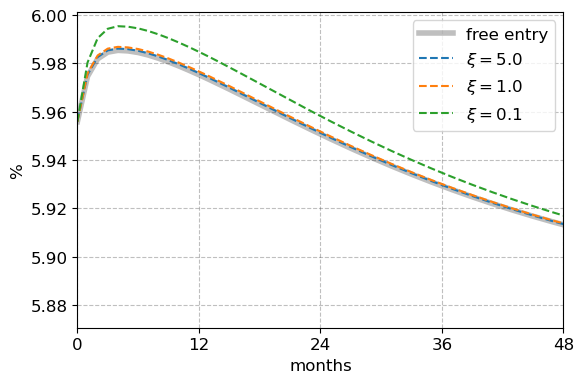

In [9]:
fig,ax = create_fig()

for model_,label in zip(models,labels):
    if model_.par.free_entry == False:
        ax.plot(model_.path.u[:,0]*100,label=label,ls='--')
    else:
        ax.plot(model_.path.u[:,0]*100,label=label,color='black',lw=4,alpha=0.25)

save_fig(fig,ax,
         filename='convergence_xi_u',
         ylabel='%',legend=True)